In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/EDGARfood.csv", index_col=0) 

In [2]:
# Defining the stages with their labels

stage_to_category = {
    "Stage 1": "Stage 1 = Land",
    "Stage 2": "Stage 2 = Agriculture",
    "Stage 3": "Stage 3 = Processing",
    "Stage 4": "Stage 4 = Transport",
    "Stage 5": "Stage 5 = Retail",
    "Stage 6": "Stage 6 = Consumption",
    "Stage 7": "Stage 7 = End of Life",
    "Stage 8": "Stage 8 = Waste",
    # Add other mappings as needed
}
# Replace the 'Stage' column with the corresponding category labels
df['FS Stage Order'] = df['FS Stage Order'].map(stage_to_category)

display(df)

,FS Stage Order,GHG,Country,Year,GHG Emissions,Unit
Food System Stage,,,,,,
Land,Stage 1 = Land,Methane (CH4),Afghanistan,1990,0.600,"metric tons CO2e (GWP-100, AR5)"
Land,Stage 1 = Land,Methane (CH4),Afghanistan,1991,0.600,"metric tons CO2e (GWP-100, AR5)"
Land,Stage 1 = Land,Methane (CH4),Afghanistan,1992,0.600,"metric tons CO2e (GWP-100, AR5)"
Land,Stage 1 = Land,Methane (CH4),Afghanistan,1993,0.600,"metric tons CO2e (GWP-100, AR5)"
Land,Stage 1 = Land,Methane (CH4),Afghanistan,1994,0.600,"metric tons CO2e (GWP-100, AR5)"
...,...,...,...,...,...,...
Waste,Stage 8 = Waste,Nitrous oxide (N2O),Zimbabwe,2011,113575.820,"metric tons CO2e (GWP-100, AR5)"
Waste,Stage 8 = Waste,Nitrous oxide (N2O),Zimbabwe,2012,114166.770,"metric tons CO2e (GWP-100, AR5)"
Waste,Stage 8 = Waste,Nitrous oxide (N2O),Zimbabwe,2013,115549.805,"metric tons CO2e (GWP-100, AR5)"


In [3]:
print(df.columns)

print(df['FS Stage Order'].unique())
# print(df['GHG Emissions'].unique())
print(df['GHG'].unique())
print(df['Year'].unique())
print(df.index.unique())

Index(['FS Stage Order', 'GHG', 'Country', 'Year', 'GHG Emissions', 'Unit'], dtype='object')
['Stage 1 = Land' 'Stage 2 = Agriculture' 'Stage 3 = Processing'
 'Stage 4 = Transport' 'Stage 5 = Retail' 'Stage 6 = Consumption'
 'Stage 7 = End of Life' 'Stage 8 = Waste']
['Methane (CH4)' 'Carbon dioxide (CO2)' 'Nitrous oxide (N2O)'
 'F-gases (Fluorinated)']
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
Index(['Land', 'Farm', 'Processing', 'Transport', 'Packaging', 'Retail',
       'Consumer', 'Waste'],
      dtype='object', name='Food System Stage')


In [4]:
# prompt: print the first row of the data<

print(df.iloc[:, 0])


Food System Stage
Land      Stage 1 = Land
Land      Stage 1 = Land
Land      Stage 1 = Land
Land      Stage 1 = Land
Land      Stage 1 = Land
              ...       
Waste    Stage 8 = Waste
Waste    Stage 8 = Waste
Waste    Stage 8 = Waste
Waste    Stage 8 = Waste
Waste    Stage 8 = Waste
Name: FS Stage Order, Length: 128700, dtype: object


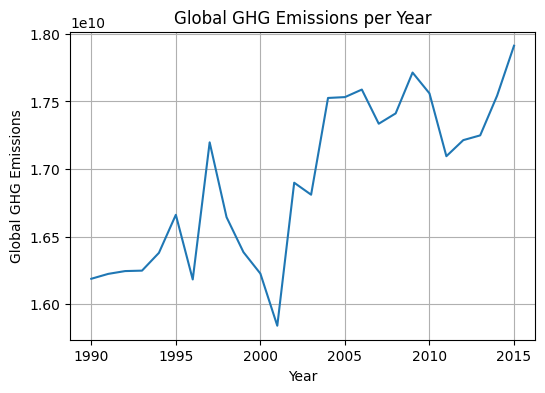

In [5]:
# Group by year and sum emissions
emissions_by_year = df.groupby('Year')['GHG Emissions'].sum()

# Create the line chart
plt.figure(figsize=(6, 4))
plt.plot(emissions_by_year.index, emissions_by_year.values)
plt.xlabel('Year')
plt.ylabel('Global GHG Emissions')
plt.title('Global GHG Emissions per Year')
plt.grid(True)
plt.show()


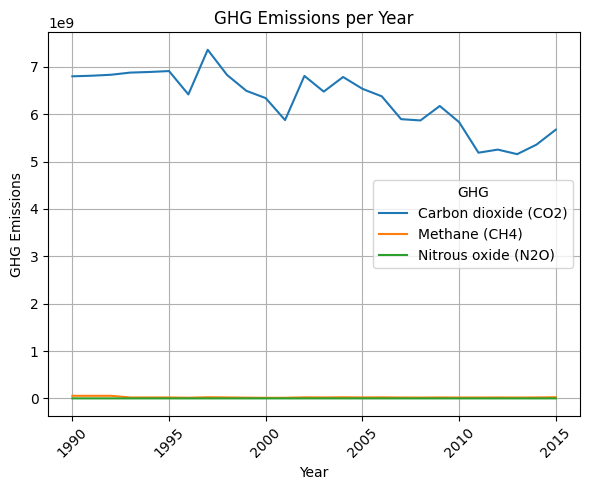

In [6]:
# Group data by year and FS stage order, then sum emissions
filtered_by_stage_1 = df[df['FS Stage Order'] == stage_to_category['Stage 1']]
emissions_by_year_stage = filtered_by_stage_1.groupby(['Year', 'GHG'])['GHG Emissions'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(6, 5))
sns.lineplot(x='Year', y='GHG Emissions', hue='GHG', data=emissions_by_year_stage)
plt.xlabel('Year')
plt.ylabel('GHG Emissions')
plt.title('GHG Emissions per Year')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


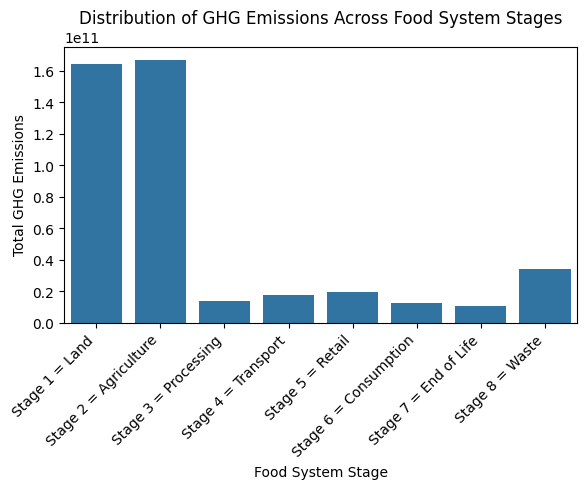

In [7]:
# Group data by 'FS Stage Order' and sum emissions
emissions_by_stage = df.groupby('FS Stage Order')['GHG Emissions'].sum()

# Create a bar chart
plt.figure(figsize=(6, 5))
sns.barplot(x=emissions_by_stage.index, y=emissions_by_stage.values)
plt.xlabel('Food System Stage')
plt.ylabel('Total GHG Emissions')
plt.title('Distribution of GHG Emissions Across Food System Stages')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

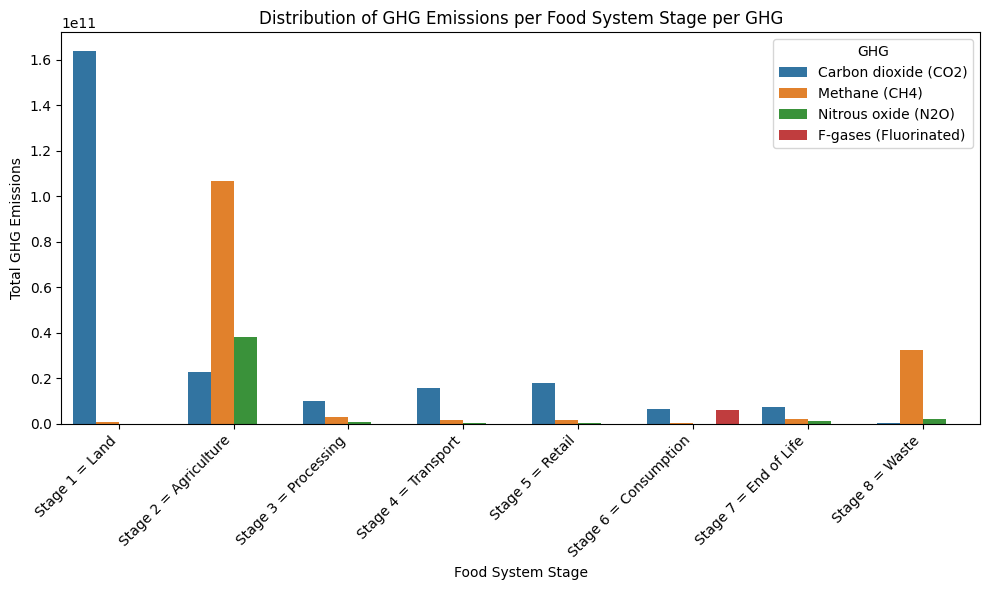

In [8]:
# Group data by 'FS Stage Order' and 'GHG', then sum emissions
emissions_by_stage_ghg = df.groupby(['FS Stage Order', 'GHG'])['GHG Emissions'].sum().reset_index()


# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='FS Stage Order', y='GHG Emissions', hue='GHG', data=emissions_by_stage_ghg)
plt.xlabel('Food System Stage')
plt.ylabel('Total GHG Emissions')
plt.title('Distribution of GHG Emissions per Food System Stage per GHG')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()